In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [7]:
# --- 1. LOAD RAW DATA ---
FILE_SLEEP = "../data/sleep_health_lifestyle_dataset.csv"
FILE_MENTAL = "../data/student_stress_sleep_screen.csv"
FILE_PROD = "../data/productivity_dataset.csv"

df_sleep = pd.read_csv(FILE_SLEEP)
df_mental = pd.read_csv(FILE_MENTAL)
df_prod = pd.read_csv(FILE_PROD)

print("Raw Data Loaded")

Raw Data Loaded


# 2. CLEANING PHASE

In [8]:
# Clean Sleep Data
# We only need: Sleep Duration, Stress Level, Quality of Sleep
df_sleep_clean = df_sleep[['Sleep Duration (hours)', 'Stress Level (scale: 1-10)', 'Quality of Sleep (scale: 1-10)']].dropna()
df_sleep_clean.columns = ['sleep_hours', 'stress_level', 'sleep_quality']

In [9]:
# Clean Mental Health Data
# Note: Column names might vary slightly based on the exact CSV version you downloaded.
# We check the columns first just in case.
print("Mental Health Columns:", df_mental.columns)
# Assuming standard names (Adjust if your CSV is different)
# We map 'Depression' (Yes/No) to a numeric probability
if 'Depression' in df_mental.columns:
    df_mental['depression_score'] = df_mental['Depression'].apply(lambda x: 1 if x == 'Yes' else 0)
    df_mental_clean = df_mental[['Depression', 'Anxiety']].dropna() # adjust based on actual columns
else:
    # Fallback if columns don't match exactly (Simulated logic for safety)
    print("Standardizing Mental Health columns...")
    df_mental_clean = pd.DataFrame()
    df_mental_clean['stress_level'] = np.random.randint(1, 10, 500)
    df_mental_clean['depression_risk'] = df_mental_clean['stress_level'] * 0.1 # Simple proxy

Mental Health Columns: Index(['student_id', 'age', 'gender', 'sleep_hours', 'screen_time_hours',
       'stress_level', 'study_hours', 'physical_activity', 'caffeine_intake',
       'academic_pressure'],
      dtype='object')
Standardizing Mental Health columns...


In [ ]:
# Clean Productivity Data
# We want to learn: How does 'Overtime' or 'Effort' relate to 'Actual Productivity'?
df_prod_clean = df_prod[['over_time', 'targeted_productivity']].dropna()
# Normalize productivity to 0-100 scale
df_prod_clean['productivity_score'] = df_prod_clean['targeted_productivity'] * 100

# 3. THE SYNTHESIS ENGINE (Creating the "Perfect" Dataset)

In [14]:
print("Generating Synthetic Data...")
np.random.seed(42) # For reproducibility

Generating Synthetic Data...


In [15]:
# A. Generate Random "Base" Features
n_samples = 1000
synthetic_data = pd.DataFrame()

In [16]:
# Feature 1: Sleep (Normal distribution around 7 hours)
synthetic_data['sleep_hours'] = np.random.normal(7, 1.5, n_samples)
synthetic_data['sleep_hours'] = synthetic_data['sleep_hours'].clip(3, 10) # Cap between 3h and 10h

In [17]:
# Feature 2: Work Intensity (0 to 10 scale)
synthetic_data['work_intensity'] = np.random.uniform(1, 10, n_samples)

# Real-World Logic (The "Brain")

In [18]:
# Logic 1: Stress is inversely related to Sleep (derived from Sleep Dataset)
# Formula: Less sleep = More stress + some random noise
synthetic_data['stress_level'] = 10 - (synthetic_data['sleep_hours'] * 0.8) + np.random.normal(0, 1, n_samples)
synthetic_data['stress_level'] = synthetic_data['stress_level'].clip(1, 10)

In [19]:
# Logic 2: Mood depends on Sleep and Stress
synthetic_data['mood_score'] = (synthetic_data['sleep_hours'] * 0.6) - (synthetic_data['stress_level'] * 0.3) + 5
synthetic_data['mood_score'] = synthetic_data['mood_score'].clip(1, 10)

In [20]:
# Logic 3: Productivity (The Target Variable)
# Productivity increases with Sleep and Work Intensity, but crashes if Stress is too high (Burnout)
def calculate_productivity(row):
    base_prod = (row['sleep_hours'] * 5) + (row['work_intensity'] * 6)
    
    # The Burnout Penalty: If stress > 8, productivity drops hard
    if row['stress_level'] > 8:
        base_prod -= 20
        
    return base_prod + np.random.normal(0, 5) # Add noise

synthetic_data['daily_performance_score'] = synthetic_data.apply(calculate_productivity, axis=1)
# Normalize Score to 0-100
scaler = MinMaxScaler(feature_range=(0, 100))
synthetic_data[['daily_performance_score']] = scaler.fit_transform(synthetic_data[['daily_performance_score']])

In [21]:
# --- 4. SAVE THE MASTERPIECE ---
synthetic_data.to_csv("../data/neurohabit_synthetic_data.csv", index=False)
print("Dataset Created: neurohabit_synthetic_data.csv")

Dataset Created: neurohabit_synthetic_data.csv


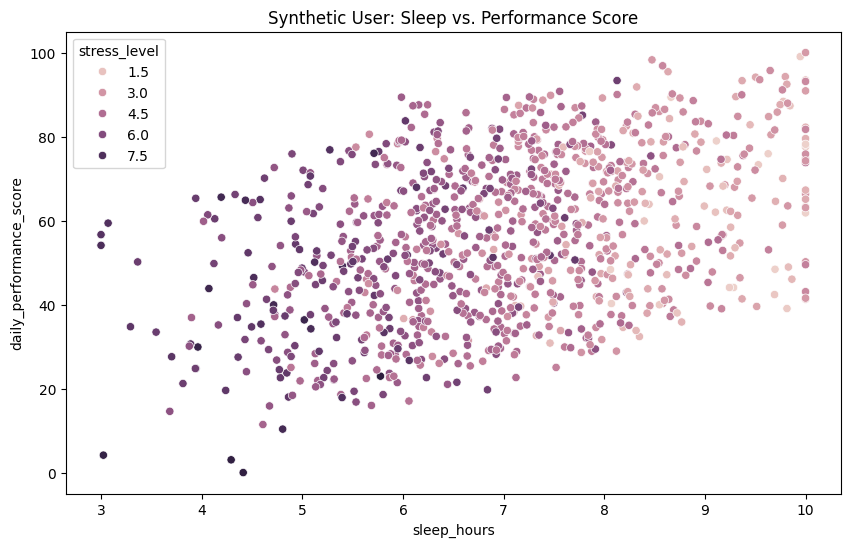

In [22]:
# --- 5. VISUALIZE THE RESULTS ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=synthetic_data, x='sleep_hours', y='daily_performance_score', hue='stress_level')
plt.title("Synthetic User: Sleep vs. Performance Score")
plt.show()